In [1]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
sales = pd.read_csv(r'C:\Users\Do Anh Luyen\BigMart_Data.csv',header = 0)

In [2]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [3]:
sales.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [4]:
sales['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [5]:
categories = []
for i in sales.columns:
    if sales.dtypes[i] == 'object':
        categories.append(i)
print(categories)

['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [6]:
counts = []
for i in categories:
    counts.append(sales[i].value_counts())

In [7]:
print(counts)

[FDW13    10
FDG33    10
NCI54     9
FDV60     9
FDT07     9
         ..
FDK57     1
FDQ60     1
FDO33     1
FDT35     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64, Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64, Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64, OUT027    935
OUT013    932
OUT046    930
OUT035    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64, Medium  

# Preprocessing data

In [8]:
mean_weight = sales.pivot_table(index = 'Item_Identifier', values = 'Item_Weight', aggfunc = 'mean' )
mean_weight.reset_index(inplace=True)
print(mean_weight)

     Item_Identifier  Item_Weight
0              DRA12       11.600
1              DRA24       19.350
2              DRA59        8.270
3              DRB01        7.390
4              DRB13        6.115
...              ...          ...
1550           NCZ30        6.590
1551           NCZ41       19.850
1552           NCZ42       10.500
1553           NCZ53        9.600
1554           NCZ54       14.650

[1555 rows x 2 columns]


In [9]:
index = sales[sales['Item_Weight'].isnull()].index.tolist()
for i in range(len(index)):
    for j in range(len(mean_weight['Item_Identifier'])):
         if mean_weight['Item_Identifier'][j] == sales['Item_Identifier'][index[i]]:
            sales['Item_Weight'][index[i]] = mean_weight['Item_Weight'][j]

# There are still 4 null values

In [10]:
other = sales[sales['Item_Weight'].isnull()].index.tolist()
print(other)

[927, 1922, 4187, 5022]


In [11]:
for i in range(len(other)):
    sales['Item_Weight'][other[i]] = sales['Item_Weight'].mean()

In [12]:
#sang outlet_size
pd.crosstab(sales['Outlet_Size'],sales['Outlet_Type'])

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0,932,0,0
Medium,0,930,928,935
Small,528,1860,0,0


In [13]:
#chon small cho GS va ST1, medium cho ST2 va ST3
index_2 = sales[sales['Outlet_Size'].isnull()].index.tolist()

for j in range(len(index_2)):
    if sales['Outlet_Type'][index_2[j]] == 'Grocery Store':
        sales['Outlet_Size'][index_2[j]] = 'Small'
    elif sales['Outlet_Type'][index_2[j]] == 'Supermarket Type1':
        sales['Outlet_Size'][index_2[j]] = 'Small'
    elif sales['Outlet_Size'][index_2[j]] == 'Supermarket Type2':
        sales['Outlet_Size'][index_2[j]] = 'Medium'
    elif sales['Outlet_Size'][index_2[j]] == 'Supermarket Type3':
        sales['Outlet_Size'][index_2[j]] = 'Medium'


In [14]:
sales.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [15]:
# change sales['Item_Fat_Content']
sales['Item_Fat_Content'] = sales['Item_Fat_Content'].replace({'LF' : 'Low Fat','reg' : 'Regular','low fat' : 'Low Fat'}) 

In [16]:
sales['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [17]:
# change sales['Item_Visibility']
sales['Item_Visibility'] = sales['Item_Visibility'].replace([0],[sales['Item_Visibility'].median()])
sales['Item_Visibility'].median()

0.05393093400000001

In [18]:
# change Item_identifier
for i in range(len(sales['Item_Identifier'])):
    sales['Item_Identifier'][i] = sales['Item_Identifier'][i].replace(sales['Item_Identifier'][i],sales['Item_Identifier'][i][0:2])

In [19]:
sales['Item_Identifier'].value_counts()

FD    6125
NC    1599
DR     799
Name: Item_Identifier, dtype: int64

In [20]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [21]:
# year
for i in range(len(sales['Outlet_Establishment_Year'])):
    sales['Outlet_Establishment_Year'][i] = 2021 - sales['Outlet_Establishment_Year'][i] 

In [22]:
categories = []
for i in sales.columns:
    if sales.dtypes[i] == 'object':
        categories.append(i)
print(categories)

['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [23]:
counts = []
for i in categories:
    counts.append(sales[i].value_counts())
print(counts)

[FD    6125
NC    1599
DR     799
Name: Item_Identifier, dtype: int64, Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64, Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64, OUT027    935
OUT013    932
OUT046    930
OUT035    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64, Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64, Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64, Supe

In [24]:
pd.crosstab(sales['Item_Type'],sales['Outlet_Size'])

Outlet_Size,High,Medium,Small
Item_Type,,,
Baking Goods,73,203,372
Breads,25,83,143
Breakfast,13,36,61
Canned,65,217,367
Dairy,80,218,384
Frozen Foods,92,274,490
Fruits and Vegetables,142,413,677
Hard Drinks,23,75,116
Health and Hygiene,61,170,289


In [25]:
sales.pivot_table(index = 'Item_Type',columns ='Outlet_Location_Type',values = 'Item_Outlet_Sales',aggfunc = 'sum')

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Item_Type,,,
Baking Goods,326773.3084,433105.5632,5.056465e+05
Breads,137308.5998,191129.2086,2.247994e+05
Breakfast,50576.8312,77356.6388,1.043655e+05
Canned,327962.4272,545605.1234,5.705839e+05
Dairy,370911.1878,525673.0688,6.260098e+05
Frozen Foods,474369.1840,629854.7896,7.215108e+05
Fruits and Vegetables,663919.1150,950565.9890,1.205575e+06
Hard Drinks,109311.7098,161648.2504,1.868335e+05
Health and Hygiene,256978.8260,347585.5506,4.406358e+05


In [26]:
# ma hoa gia tri
from sklearn.preprocessing import LabelEncoder
lb =  LabelEncoder()
sales['Item_Type'] = lb.fit_transform(sales['Item_Type'])
sales['Outlet_Identifier'] = lb.fit_transform(sales['Outlet_Identifier'])
sales['Outlet_Type'] = lb.fit_transform(sales['Outlet_Type'])

In [27]:
sales = pd.get_dummies(sales)

In [28]:
print("{}".format(sales['Item_Type'].unique()))
a= pd.read_csv(r'C:\Users\Do Anh Luyen\BigMart_Data.csv',header = 0)
b= a['Item_Type'].unique()
pd.DataFrame(sales['Item_Type'].unique(),b)

[ 4 14 10  6  9  0 13  5  2  8  7  3  1 15 11 12]


,0
Dairy,4
Soft Drinks,14
Meat,10
Fruits and Vegetables,6
Household,9
Baking Goods,0
Snack Foods,13
Frozen Foods,5
Breakfast,2
Health and Hygiene,8


In [29]:
print("{}".format(sales['Outlet_Identifier'].unique()))
a= pd.read_csv(r'C:\Users\Do Anh Luyen\BigMart_Data.csv',header = 0)
b=a['Outlet_Identifier'].unique()
pd.DataFrame(sales['Outlet_Identifier'].unique(),b)

[9 3 0 1 5 7 2 8 6 4]


,0
OUT049,9
OUT018,3
OUT010,0
OUT013,1
OUT027,5
OUT045,7
OUT017,2
OUT046,8
OUT035,6
OUT019,4


In [30]:
print("{}".format(sales['Outlet_Type'].unique()))
a= pd.read_csv(r'C:\Users\Do Anh Luyen\BigMart_Data.csv',header = 0)
b=a['Outlet_Type'].unique()
pd.DataFrame(sales['Outlet_Type'].unique(),b)

[1 2 0 3]


,0
Supermarket Type1,1
Supermarket Type2,2
Grocery Store,0
Supermarket Type3,3


In [31]:
print(sales.shape)

(8523, 19)


In [32]:
A = []
B = []
C = []
for i in range(len(sales['Item_Outlet_Sales'])):
    if sales['Item_Outlet_Sales'][i] < 1000:
        A.append(i)
    elif sales['Item_Outlet_Sales'][i] < 10000:
        B.append(i)
    else:
        C.append(i)

In [33]:
for i in A:
    sales['Item_Outlet_Sales'][i] = str(sales['Item_Outlet_Sales'][i]).replace(str(sales['Item_Outlet_Sales'][i]),"A")  

In [34]:
for i in B:
    sales['Item_Outlet_Sales'][i] = str(sales['Item_Outlet_Sales'][i]).replace(str(sales['Item_Outlet_Sales'][i]),"B")  

In [35]:
for i in C:
    sales['Item_Outlet_Sales'][i] = str(sales['Item_Outlet_Sales'][i]).replace(str(sales['Item_Outlet_Sales'][i]),"C")  

In [36]:
print(sales['Item_Outlet_Sales'].value_counts())

B    6011
A    2504
C       8
Name: Item_Outlet_Sales, dtype: int64


In [37]:
sales['Item_Outlet_Sales'] = lb.fit_transform(sales['Item_Outlet_Sales'])
print(sales['Item_Outlet_Sales'].value_counts())

1    6011
0    2504
2       8
Name: Item_Outlet_Sales, dtype: int64


# Hypothesis 

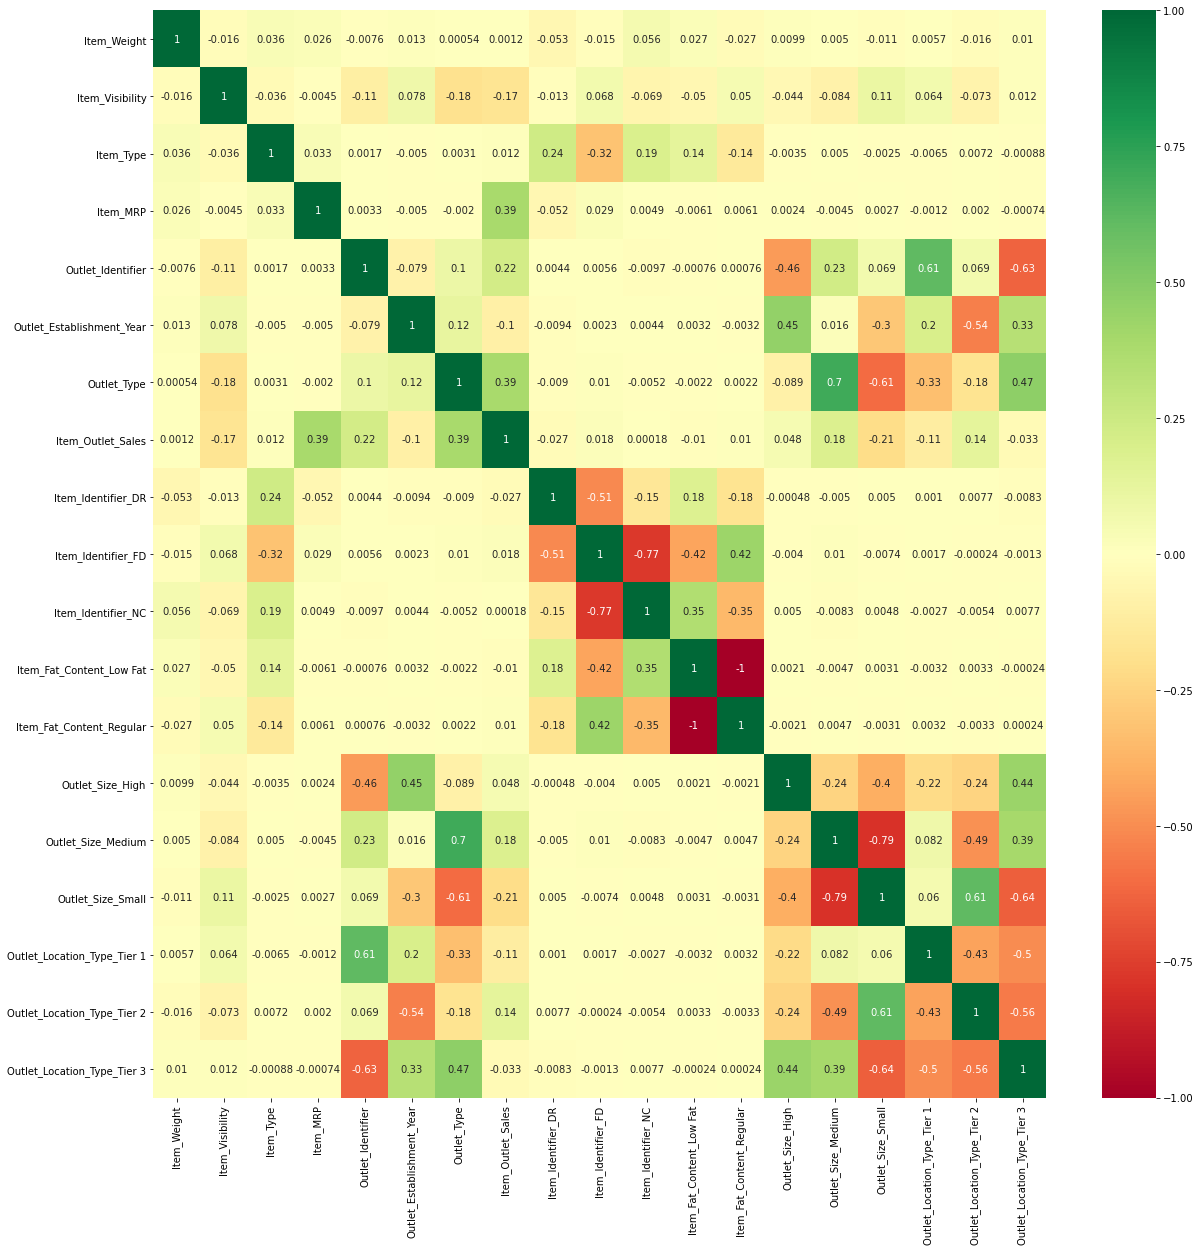

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
corrmat = sales.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(sales[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [39]:
# the normal hypothesis 
# As corr() between Item_Outlet_sales and Item MRP ~ 0.57 means when Item MRP increases leading to increase in Item_Outlet_sales

In [40]:
sales.to_csv(r'C:\Users\Do Anh Luyen\BigMart_pre_Long-Luyện_Group.csv',index = False)

# train_test_split 

In [41]:
# chia independent(X) and dependent(y) variables
# y is continuous data
X = sales.drop(['Item_Outlet_Sales'],axis = 1)
y = sales['Item_Outlet_Sales']

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7, random_state = 42)

In [43]:
X.to_csv(r'C:\Users\Do Anh Luyen\BigMart_tra_Long-Luyện_Group.csv',index = False)

In [44]:
y.to_csv(r'C:\Users\Do Anh Luyen\BigMart_tes_Long-Luyện_Group.csv',index = False)

# feature selection 

In [45]:
y=y.astype('int')
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['name','Score']  #naming the dataframe columns
print(featureScores.nlargest(18,'Score'))

                           name         Score
3                      Item_MRP  35508.542095
4             Outlet_Identifier    739.339892
6                   Outlet_Type    683.149472
5     Outlet_Establishment_Year    332.949545
13           Outlet_Size_Medium    197.920555
14            Outlet_Size_Small    158.186181
16  Outlet_Location_Type_Tier 2    119.636721
15  Outlet_Location_Type_Tier 1     75.719983
12             Outlet_Size_High     17.891749
17  Outlet_Location_Type_Tier 3     14.401270
1               Item_Visibility      8.341029
7            Item_Identifier_DR      6.195824
2                     Item_Type      3.312399
0                   Item_Weight      1.087358
8            Item_Identifier_FD      0.738940
11     Item_Fat_Content_Regular      0.595849
10     Item_Fat_Content_Low Fat      0.324655
9            Item_Identifier_NC      0.166555


In [46]:
# we can see all features are important so we will use all

# Build model

# liner model

train_score: 0.4672934323357183
test_score: 0.4730000852332201


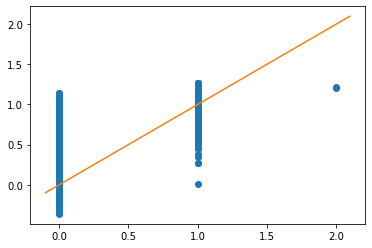

In [47]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train,y_train)
y_predic = lr.predict(X_test)
print("train_score: {}".format(lr.score(X_train,y_train)))
print("test_score: {}".format(lr.score(X_test,y_test)))
plt.plot(y_test,y_predic,'o')
axes = plt.gca()
plt.plot(axes.get_xlim(),axes.get_xlim(), '-')
plt.show()

# Logistic regression

In [48]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(C=10^9).fit(X_train,y_train)
print("train_score: {}".format(lg.score(X_train,y_train)))
print("test_score: {}".format(lg.score(X_test,y_test)))

train_score: 0.8826684545759302
test_score: 0.8826750097770825


# KNN

In [49]:
from sklearn.neighbors import KNeighborsClassifier
kn =KNeighborsClassifier().fit(X_train,y_train)
print("train_score: {}".format(kn.score(X_train,y_train)))
print("test_score: {}".format(kn.score(X_test,y_test)))

train_score: 0.8853503184713376
test_score: 0.8513883457176379


# support vector machine 

In [50]:
from sklearn.svm import SVC
svm = SVC(kernel= 'linear', random_state=1, C=0.1)
svm.fit(X_train, y_train)
print("train_score: {}".format(svm.score(X_train,y_train)))
print("test_score: {}".format(svm.score(X_test,y_test)))

train_score: 0.8835065370432451
test_score: 0.8904966757919437


# model evaluation for svm

In [51]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [52]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))

Test set score: 0.89
Best parameters: {'C': 100, 'gamma': 0.001}


In [53]:
svm = SVC(C=100, gamma = 0.001)
svm.fit(X_train, y_train)
print("train_score: {}".format(svm.score(X_train,y_train)))
print("test_score: {}".format(svm.score(X_test,y_test)))

train_score: 0.8918873617163929
test_score: 0.8920610089949159


# decision tree

In [54]:
from sklearn.tree import DecisionTreeClassifier

dc = DecisionTreeClassifier(max_depth=4).fit(X_train,y_train)
print("train_score: {}".format(dc.score(X_train,y_train)))
print("test_score: {}".format(dc.score(X_test,y_test)))
#seem that i = 4 is the best 

train_score: 0.8923902111967817
test_score: 0.8920610089949159


# RandomForest 

In [55]:
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier(max_depth=10,n_estimators = 100).fit(X_train,y_train)
print("train_score: {}".format(rc.score(X_train,y_train)))
print("test_score: {}".format(rc.score(X_test,y_test))) 

train_score: 0.914683204827355
test_score: 0.892843175596402


# model evaluation for randomforest

In [56]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': [1,2,3,4,5,6,7,8,9,10],
'n_estimators': [10,50,100,150]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test set score: 0.90


In [57]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best test score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 9, 'n_estimators': 50}
Best test score: 0.89


In [58]:
rr = RandomForestClassifier(max_depth=9,n_estimators = 50).fit(X_train,y_train)
print("train_score: {}".format(rr.score(X_train,y_train)))
print("test_score: {}".format(rr.score(X_test,y_test))) 

train_score: 0.906972846128059
test_score: 0.892452092295659


In [59]:
!pip install xgboost

In [60]:
from xgboost import XGBClassifier
xr = XGBClassifier(n_estimators = 1000, learning_rate=0.01).fit(X_train,y_train)
print("train_score: {}".format(xr.score(X_train,y_train)))
print("test_score: {}".format(xr.score(X_test,y_test))) 

[13:01:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train_score: 0.9163593697619846
test_score: 0.8912788423934298


In [61]:
from sklearn.neural_network import MLPClassifier
mr = MLPClassifier().fit(X_train,y_train)
print("train_score: {}".format(mr.score(X_train,y_train)))
print("test_score: {}".format(mr.score(X_test,y_test))) 

train_score: 0.8888702648340596
test_score: 0.8908877590926867


# thu du doan Outlet_size dua tren Item_identifier 

In [62]:
new_sales = pd.read_csv(r'C:\Users\Do Anh Luyen\BigMart_Data.csv',header = 0)

In [63]:
# change Item_identifier
for i in range(len(new_sales['Item_Identifier'])):
    new_sales['Item_Identifier'][i] = new_sales['Item_Identifier'][i].replace(new_sales['Item_Identifier'][i],new_sales['Item_Identifier'][i][0:2])
    

In [64]:
pd.crosstab(new_sales['Outlet_Size'],new_sales['Item_Identifier'])

Item_Identifier,DR,FD,NC
Outlet_Size,,,
High,87,665,180
Medium,256,2026,511
Small,220,1720,448


In [65]:
index_2 = new_sales[new_sales['Outlet_Size'].isnull()].index.tolist()

for j in range(len(index_2)):
    if new_sales['Outlet_Type'][index_2[j]] == 'Grocery Store':
        new_sales['Outlet_Size'][index_2[j]] = 'Medium'
    elif new_sales['Outlet_Type'][index_2[j]] == 'Supermarket Type1':
        new_sales['Outlet_Size'][index_2[j]] = 'Medium'
    elif new_sales['Outlet_Size'][index_2[j]] == 'Supermarket Type2':
        new_sales['Outlet_Size'][index_2[j]] = 'Medium'
    elif new_sales['Outlet_Size'][index_2[j]] == 'Supermarket Type3':
        new_sales['Outlet_Size'][index_2[j]] = 'Medium'

In [66]:
new_sales = pd.read_csv(r'C:\Users\Do Anh Luyen\a.csv',header=0)
new_sales= pd.get_dummies(new_sales)

In [67]:
X_new = new_sales.drop(['Item_Outlet_Sales'],axis = 1)
y_new = new_sales['Item_Outlet_Sales']

In [68]:
from sklearn.model_selection import train_test_split
X_trainew,X_testew,y_trainew,y_testew = train_test_split(X_new,y_new,train_size = 0.7, random_state = 42)

In [69]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
lr = LinearRegression().fit(X_trainew,y_trainew)
print("train_score: {}".format(lr.score(X_trainew,y_trainew)))
print("test_score: {}".format(lr.score(X_testew,y_testew)))

train_score: 0.5435969420964906
test_score: 0.5495649811228116
